In [1]:
import seaborn as sns
sns.set() # better graphs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def draw_policy_distribution(path, title, svg=None):
    category_names = [
        'Hitler elected',
        'Fascist policies',
        'Liberal policies',
        'Hitler executed'
    ]
    colors = [
        '#510f0c',
        '#a32018',
        '#5577b4',
        '#2b3c5b',
    ]
    labels = list(map(lambda n: str(n), range(0, 18)))
    raw = pd.read_csv(path)
    game_count = 1000000
    results = np.vstack([
        raw['HitlerElected'] / game_count * 100,
        raw['FascistPolicies'] / game_count * 100,
        raw['LiberalPolicies'] / game_count * 100,
        raw['HitlerExecuted'] / game_count * 100
    ])
    sums = np.cumsum(results, axis=0)

    fig, ax = plt.subplots(figsize=(10, 7))
    plt.title(title, y=1.1, fontsize='large')
    ax.invert_yaxis()
    ax.set_xlabel("Liberal policy count")
    ax.set_ylabel("% of occurences out of 1M games")
    for i, bar in enumerate(results):
        starts = sums[i, :] - bar
        ax.bar(labels, bar, bottom=starts, width=0.9, label=category_names[i], color=colors[i])

        ycenters = starts + bar / 2
        for x, (y, value) in enumerate(zip(ycenters, bar)):
            ivalue = int(round(value))
            if ivalue != 0:
                ax.text(x, y, str(ivalue), ha='center', va='center', color='white')
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
    if svg is not None:
        plt.savefig(svg)
    plt.show()

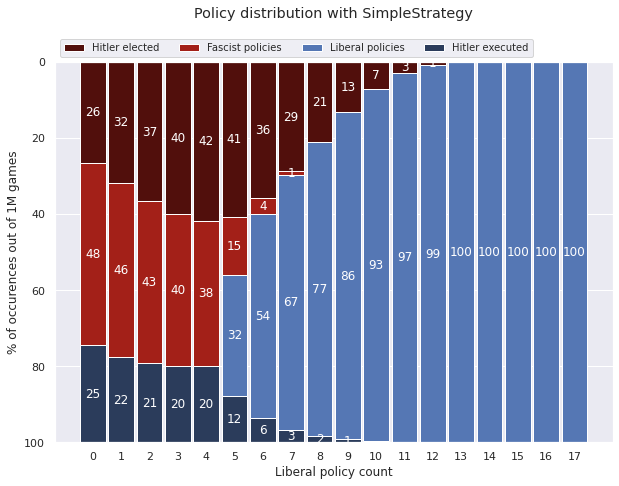

In [3]:
draw_policy_distribution('simple_policy_distribution.csv', "Policy distribution with SimpleStrategy", 'simple_policy_distribution.svg')

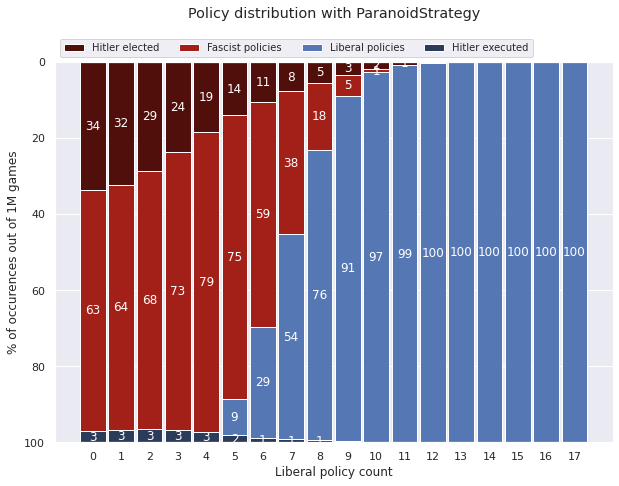

In [4]:
draw_policy_distribution('paranoid_policy_distribution.csv', "Policy distribution with ParanoidStrategy")

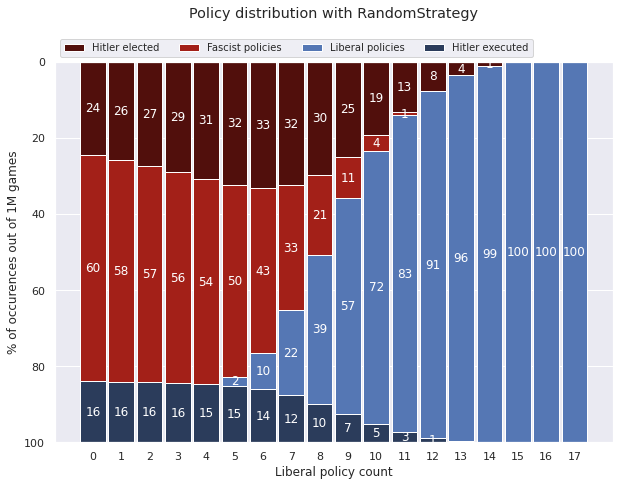

In [5]:
draw_policy_distribution('random_policy_distribution.csv', "Policy distribution with RandomStrategy")

In [6]:
def draw_presets(path, title, svg=None):
    category_names = [
        'Hitler elected',
        'Fascist policies',
        'Liberal policies',
        'Hitler executed'
    ]
    colors = [
        '#510f0c',
        '#a32018',
        '#5577b4',
        '#2b3c5b',
    ]
    raw = pd.read_csv(path)
    raw['_Sort'] = raw['HitlerElected'] + raw['FascistPolicies']
    raw = raw.sort_values('_Sort', ascending = False)
    game_count = 1000000
    results = np.vstack([
        raw['HitlerElected'] / game_count * 100,
        raw['FascistPolicies'] / game_count * 100,
        raw['LiberalPolicies'] / game_count * 100,
        raw['HitlerExecuted'] / game_count * 100
    ])
    labels = []
    for (f, l) in zip(raw['FascistStrategy'], raw['LiberalStrategy']):
        labels.append(f'{f} x {l}')
    sums = np.cumsum(results, axis=0)

    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title(title, y=1.1, fontsize='large')
    ax.invert_yaxis()
    ax.set_ylabel("Fascist strategy x Liberal strategy")
    ax.set_xlabel("% of occurences out of 1M games")
    for i, bar in enumerate(results):
        starts = sums[i, :] - bar
        ax.barh(labels, bar, left=starts, height=0.8, label=category_names[i], color=colors[i])

        xcenters = starts + bar / 2
        for y, (x, value) in enumerate(zip(xcenters, bar)):
            ivalue = int(round(value))
            if ivalue != 0:
                ax.text(x, y, str(ivalue), ha='center', va='center', color='white')
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
    if svg is not None:
        plt.savefig(svg, bbox_inches='tight')
    plt.show()

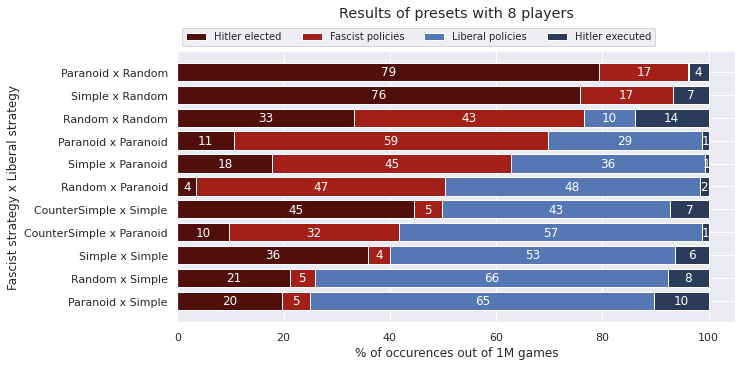

In [7]:
draw_presets('presets_results.csv', "Results of presets with 8 players", 'presets_results.svg')

In [8]:
def draw_presets_avg_round_count(path, title, svg=None):
    raw = pd.read_csv(path)
    raw = raw.sort_values('RoundCountSum')
    game_count = 1000000
    results = raw['RoundCountSum'] / game_count
    labels = []
    for (f, l) in zip(raw['FascistStrategy'], raw['LiberalStrategy']):
        labels.append(f'{f} x {l}')

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(title)
    ax.set_ylabel("Fascist strategy x Liberal strategy")
    ax.set_xlabel("Round count")
    ax.barh(labels, results, color='#a32018')
    xstep = 3
    max_rounds = (int(max(results)) // 3 + 1) * 3
    plt.xticks(range(0, max_rounds + 1, 3))
    if svg is not None:
        plt.savefig(svg)
    plt.show()
    

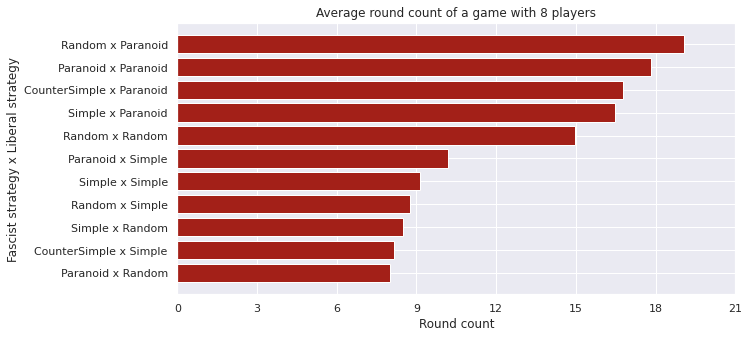

In [9]:
draw_presets_avg_round_count('presets_results.csv', 'Average round count of a game with 8 players', 'presets_round_count.svg')

In [10]:
def draw_tracker(path, title, svg=None):
    category_names = [
        'Hitler elected',
        'Fascist policies',
        'Liberal policies',
        'Hitler executed'
    ]
    colors = [
        '#510f0c',
        '#a32018',
        '#5577b4',
        '#2b3c5b',
    ]
    raw = pd.read_csv(path)
    labels = list(map(lambda i: str(i), raw['TrackerLength']))
    game_count = 1000000
    results = np.vstack([
        raw['HitlerElected'] / game_count * 100,
        raw['FascistPolicies'] / game_count * 100,
        raw['LiberalPolicies'] / game_count * 100,
        raw['HitlerExecuted'] / game_count * 100
    ])
    sums = np.cumsum(results, axis=0)

    fig, ax = plt.subplots(figsize=(10, 7))
    plt.title(title, y=1.1, fontsize='large')
    ax.set_xlabel("Election tracker length")
    ax.set_ylabel("% of occurences out of 1M games")
    for i, bar in enumerate(results):
        starts = sums[i, :] - bar
        ax.bar(labels, bar, bottom=starts, width=0.8, label=category_names[i], color=colors[i])

        xcenters = starts + bar / 2
        for y, (x, value) in enumerate(zip(xcenters, bar)):
            ivalue = int(round(value))
            if ivalue != 0:
                ax.text(y, x, str(ivalue), ha='center', va='center', color='white')
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
    if svg is not None:
        plt.savefig(svg)
    plt.show()

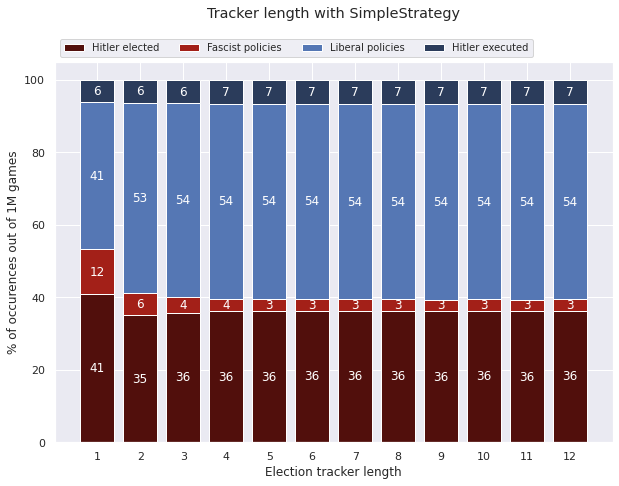

In [11]:
draw_tracker('simple_tracker.csv', 'Tracker length with SimpleStrategy', 'simple_tracker.svg')

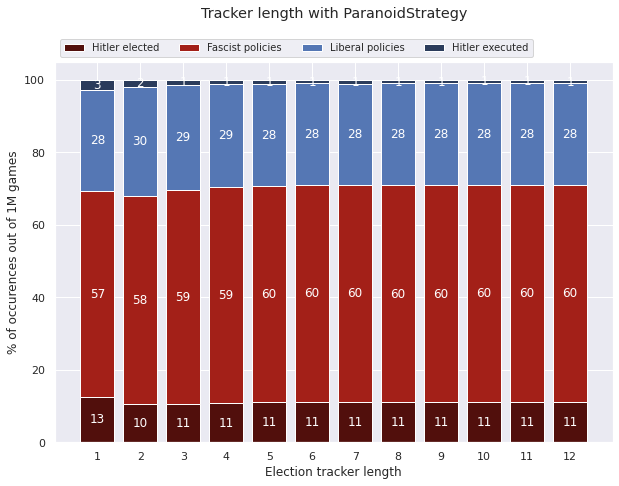

In [12]:
draw_tracker('paranoid_tracker.csv', 'Tracker length with ParanoidStrategy')

In [13]:
def draw_trackers_round_count(paths, categories, title, max_length, svg=None):
    xs = np.arange(max_length) + 1
    colors = [
        '#510f0c',
        '#a32018',
        '#5577b4',
        '#2b3c5b',
    ]
    counts = []
    max_count = 0;
    for path in paths:
        raw = pd.read_csv(path)
        game_count = 1000000
        results = raw['RoundCountSum'] / game_count
        max_count = max(max_count, max(results))
        counts.append(results)

    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title(title, y=1.1, fontsize='large')
    ax.set_title(title)
    ax.set_xlabel("Election tracker length")
    ax.set_ylabel("Average round count")
    width = 0.9 / len(paths)
    for i in range(0, len(paths)):
        ax.bar(xs - 0.45 + width / 2 + i * width, counts[i], width=width, color=colors[i % len(colors)], label=categories[i])
    ax.legend(ncol=len(categories), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
    max_rounds = (int(max_count) // 3 + 1) * 3
    plt.yticks(range(0, max_rounds + 1, 3))
    plt.xticks(range(1, max_length + 1))
    if svg is not None:
        plt.savefig(svg)
    plt.show()

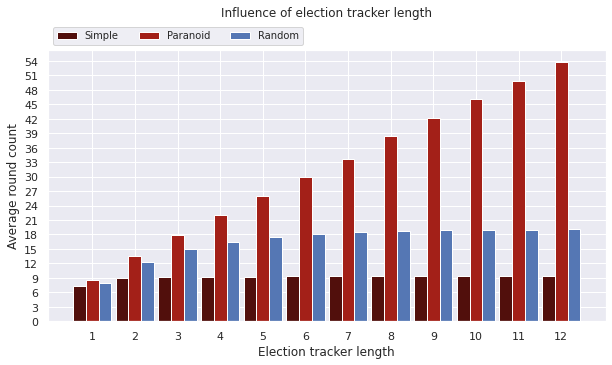

In [14]:
draw_trackers_round_count(['simple_tracker.csv', 'paranoid_tracker.csv', 'random_tracker.csv'], ['Simple', 'Paranoid', 'Random'], 'Influence of election tracker length', 12, 'tracker_round_count.svg')